In [1]:
# page 111 - Linear Regression
# using the Normal Equation (closed form) to compute theta that minimizes a mse cost function


import numpy as np


x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

x_b = np.c_[np.ones((100, 1)), x]   # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

print(type(x))
print(type(y))
print(type(x_b))
print(type(theta_best))
print()

print(x.shape)
print(y.shape)
print(x_b.shape)
print(x_b[0:5,:])
print(y[0:5])
print(theta_best.shape)
print()

print(x_b.T.shape)
print(x_b.T.dot(x_b).shape)
print(theta_best)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(100, 1)
(100, 1)
(100, 2)
[[1.         0.62183882]
 [1.         0.9889211 ]
 [1.         1.39760983]
 [1.         1.39007504]
 [1.         0.10053603]]
[[5.97617541]
 [7.0968962 ]
 [8.43248377]
 [7.1409418 ]
 [3.88384181]]
(2, 1)

(2, 100)
(2, 2)
[[3.93680408]
 [3.16243522]]


[[0]
 [2]]
[[ 3.93680408]
 [10.26167452]]


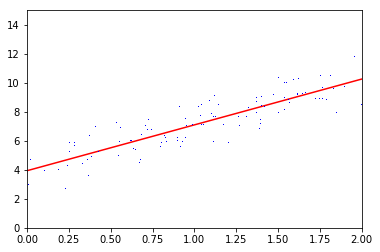

In [2]:
# page 111 - making predictions from above
x_new = np.array([[0], [2]])
print(x_new)
x_new_b = np.c_[np.ones((2,1)), x_new] # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
print(y_predict)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(x_new, y_predict, "r-")
plt.plot(x,y, "b,")
plt.axis([0, 2, 0, 15])
plt.show()


In [4]:
# pate 112 - the equivalent code using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(x_new))


[3.93680408] [[3.16243522]]
[[ 3.93680408]
 [10.26167452]]


In [11]:
# page 117
# Batch Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    foo = x_b.dot(theta) - y
    
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)


[[3.93680408]
 [3.16243522]]


In [14]:
# page 120
# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradiants = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print(theta)
        

[[-0.06926619]
 [ 0.55563662]]


In [15]:
# page 121
# Linear Regression using Stochastic Gradient Descent using Scikit-Learn SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)


[3.94839438] [3.16198318]


/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [16]:
# page 123
# Polynomial Regression
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(m,1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)


[2.56669525]
[2.56669525 6.5879245 ]
[2.49738764] [[1.02635742 0.50974508]]


In [19]:
# page 125
# Learning Curves

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    #plt.ymax=10
    #print(plt.ymax)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

                                                                      


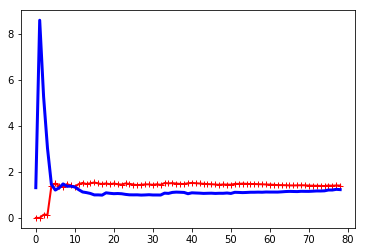

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

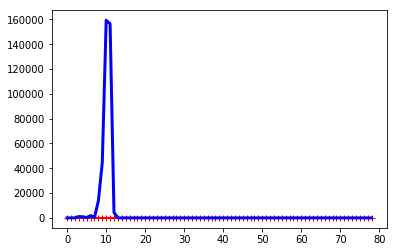

In [21]:
# page 127
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())])

plot_learning_curves(polynomial_regression, x, y)

In [36]:
# page 129 - Regularized Linear Models - Ridge regression (uses l2 norm as normalization term)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x,y)
print(ridge_reg.predict([[1.5]]))

# using stochastic gradient descent
sgd_reg = SGDRegressor(penalty="L2")
sgd_reg.fit(x,y.ravel())
print(sgd_reg.predict([[1.5]]))



[[5.54437795]]
[4.52599458]


/home/chris/Documents/projects_scikit_tensorflow/env/local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [37]:
# page 132 Lasso Regression (uses l1 norm as normalization term)
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
print(lasso_reg.predict([[1.5]]))


[5.50420003]


In [38]:
# Page 134 - Elastic Net - middle ground between Ridge and Lasso - uses mix ratio r
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)
print(elastic_net.predict([[1.5]]))


[5.50682438]


In [52]:
# page 139 - Logistic Regression
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
print()

#print(type(iris["DESCR"]))
#print(type(iris["target_names"]))
#print(type(iris["data"]))
#print(type(iris["target"]))
#print(type(iris["feature_names"]))
#print()

#print(iris["DESCR"])
#print(iris["target_names"])
#print(iris["feature_names"])

x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
print(log_reg.fit(x,y))



['DESCR', 'target_names', 'data', 'target', 'feature_names']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [56]:
# page 144 - Multinomial Logistic Regression
x = iris["data"][:, (2,3)]  #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
#print(softmax_reg.fit(x,y))
softmax_reg.fit(x,y)

# predict
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))


                                

[2]
[[6.33134078e-07 5.75276067e-02 9.42471760e-01]]
